# **6 Statistische Modelle - Beispiel 3: Logistische Regression**
------------------------------------------------

## a) Notwendige Bibliotheken laden

**LIBRARIES:**

* pandas für Verarbeitung von Tabellen-Daten
* numpy für die Berechnung von Zusammenhängen (z.B. Korrelationen)
* missingno für die Visualisierung von fehlenden Datenpunkten
* matplotlib, seaborn, plotly für die Visualisierung

* scikit learn - machine learning Bibliothek


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as io
io.renderers.default='browser'

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.
init_notebook_mode(connected=True) 

from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter("ignore")

# Datensatz high_diamond_ranked_10min.csv - Metadaten
---------------------------------------------------

*   League of Legends Diamond Ranked Games (10 min)
*   Classify LoL ranked games outcome by looking at the first 10min worth of data



LOL (League of Legends) is a multiplayer online battle arena where 2 teams (blue and red) face off. There are 3 lanes, a jungle, and 5 roles. The goal is to take down the enemy Nexus to win the game.

There are 19 features per team (38 in total) collected after 10min in-game. This includes kills, deaths, gold, experience, level…

The column *blueWins* is the **target value** (the value we are trying to predict). A value of 1 means the blue team has won, 0 otherwise.

Source: Riot Games API


## b) Daten einlesen und inspizieren

In [13]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [14]:
df.shape

(9879, 40)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

## c) Fehlende Werte

*   Abfrage mit function isnull
*   **Visualisierung** mit missingno



In [16]:
for col in df.columns:
    pct_missing = df[col].isnull().sum()
    print(f'{col} - {pct_missing :}')

gameId - 0
blueWins - 0
blueWardsPlaced - 0
blueWardsDestroyed - 0
blueFirstBlood - 0
blueKills - 0
blueDeaths - 0
blueAssists - 0
blueEliteMonsters - 0
blueDragons - 0
blueHeralds - 0
blueTowersDestroyed - 0
blueTotalGold - 0
blueAvgLevel - 0
blueTotalExperience - 0
blueTotalMinionsKilled - 0
blueTotalJungleMinionsKilled - 0
blueGoldDiff - 0
blueExperienceDiff - 0
blueCSPerMin - 0
blueGoldPerMin - 0
redWardsPlaced - 0
redWardsDestroyed - 0
redFirstBlood - 0
redKills - 0
redDeaths - 0
redAssists - 0
redEliteMonsters - 0
redDragons - 0
redHeralds - 0
redTowersDestroyed - 0
redTotalGold - 0
redAvgLevel - 0
redTotalExperience - 0
redTotalMinionsKilled - 0
redTotalJungleMinionsKilled - 0
redGoldDiff - 0
redExperienceDiff - 0
redCSPerMin - 0
redGoldPerMin - 0


## d) Duplikate

redundante Datenpunkte finden und entfernen

In [17]:
df.duplicated().sum()

0

## g) Erste Übersicht visualisieren

hilfreich zur Bewertung der Datenqualität

In [18]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [19]:
# GameID nicht benötigt sowie alle Einträge zum roten Team
drop_list = ["gameId", "blueTotalGold", "blueTotalExperience", "blueCSPerMin", "blueGoldPerMin", 'redWardsPlaced', 'redWardsDestroyed',
             'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
             'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
             'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']
df = df.drop(drop_list, axis=1)
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff
0,0,28,2,1,9,6,11,0,0,0,0,6.6,195,36,643,-8
1,0,12,1,0,5,5,5,0,0,0,0,6.6,174,43,-2908,-1173
2,0,15,0,0,7,11,4,1,1,0,0,6.4,186,46,-1172,-1033
3,0,43,1,0,4,5,5,1,0,1,0,7.0,201,55,-1321,-7
4,0,75,4,0,6,6,6,0,0,0,0,7.0,210,57,-1004,230


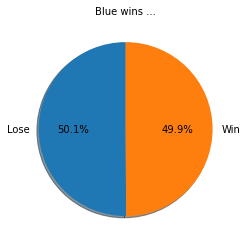

In [20]:
# Wie oft hat Blau denn gewonnen?
c_count = df['blueWins'].value_counts()
fig, ax = plt.subplots()
ax.pie(c_count, labels=['Lose', 'Win'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Blue wins ...", fontsize=10)
plt.show()

* Wie sind denn die Abhängigkeiten den Variablen untereinander?

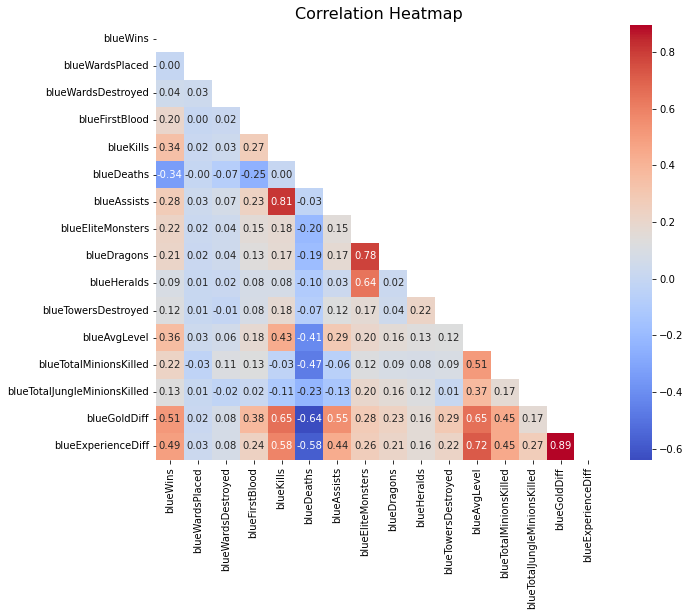

In [21]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Statistisches Modell - logistische Regression

* Entscheidung nach Wahrscheinlichkeitsberechnung für y
* wir wollen vorhersagen: y = blueWins (abhängige Variable)


In [22]:
# Festlegung für das Modell: X und y
X = df.iloc[:, 1:19].values
y = df.iloc[:, 0].values

* Splitten des Datensatzes in einen "Trainings-Datensatz" und einen "Test-Datensatz"
* Bewährte Praxis:70% als Trainingsdaten und 30% als Testdaten (für Modellvalidierung)
* random_state sorgt für zufällige Auswahl (bei none werden jedes mal andere Samples ausgewählt, ansonsten eine Ganzzahl)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

**Anwenden einer Skalierung**

Der StandardScaler wird oft verwendet, um Daten zu standardisieren, was bedeutet, dass die Daten so transformiert werden, dass sie eine Mittelwert von 0 und eine Standardabweichung von 1 haben. Die Standardisierung ist besonders nützlich, wenn die Skalen der verschiedenen Features in den Daten unterschiedlich sind oder wenn du Methoden verwendest, die auf der Entfernung zwischen Datenpunkten basieren, wie z. B. k-Nearest Neighbors oder Support Vector Machines. Es hilft auch, die Algorithmen zu stabilisieren, insbesondere wenn verschiedene Features unterschiedliche Einheiten haben.

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

* Logistische Regression aus Bibliothek sklearn

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Vorhersage für Testdaten
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.7253711201079622


## Modell-Evaluation
* Anzeigen der Konfusionsmatrix
* Klassifikationsreport
* ROC Kurve

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1067,388,1455
1,426,1083,1509
All,1493,1471,2964


**Classification Report**

1. Precision (Präzision):
Der Anteil der wahren positiven Vorhersagen unter allen positiven Vorhersagen.
Precision = TP / (TP + FP)

2. Recall (Rückruf):
Der Anteil der wahren positiven Vorhersagen unter allen tatsächlichen positiven Instanzen.
Recall = TP / (TP + FN)

3. F1-Score:
Das harmonische Mittel aus Precision und Recall.
F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

4. Support:
Die Anzahl der tatsächlichen Instanzen für jede Klasse.

5. Accuracy (Genauigkeit):
Der Anteil der korrekten Vorhersagen insgesamt.
Accuracy = (TP + TN) / (TP + TN + FP + FN)

6. Macro AVG (Makro-Durchschnitt):
Der Durchschnitt der Metriken für jede Klasse, ohne dabei die Klassenhäufigkeiten zu berücksichtigen.

7. Weighted AVG (Gewichteter Durchschnitt):
Der gewichtete Durchschnitt der Metriken für jede Klasse, wobei die Klassenhäufigkeiten berücksichtigt werden.

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1455
           1       0.74      0.72      0.73      1509

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964



Die ROC-Kurve (Receiver Operating Characteristic) ist ein Grafikdarstellungstool, das in der binären Klassifikation verwendet wird, um die Leistung eines Modells darzustellen. Die ROC-Kurve zeigt das Verhältnis zwischen der True Positive Rate und der False Positive Rate über verschiedene Schwellenwerte für die Klassifikation. Die ROC-Kurve selbst ist ein Diagramm und befindet sich idealerweise näher an der linken oberen Ecke des Diagramms, was auf eine bessere Modellleistung hinweist. Je weiter die Kurve von der diagonalen Linie (Zufallsrate) entfernt ist, desto besser ist das Modell.

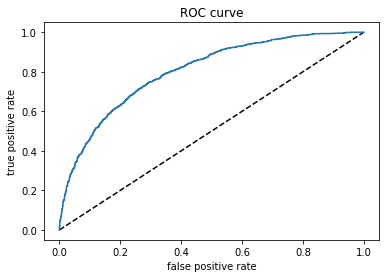

In [28]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC curve')
plt.show()

Eine ROC-Kurve nahe der Diagonalen deutet auf einen Zufallsprozess hin: Werte nahe der Diagonalen bedeuten eine gleiche Trefferquote und Falschpositivquote, was der zu erwartenden Trefferhäufigkeit eines Zufallsprozesses entspricht. Die ideale ROC-Kurve steigt zunächst senkrecht an (die Trefferquote liegt nahe bei 100 %, während die Fehlerquote anfangs noch nahe bei 0 % bleibt), erst danach steigt die Falsch-Positiv-Rate an. Eine ROC-Kurve, die deutlich unterhalb der Diagonalen bleibt, deutet darauf hin, dass die Werte falsch interpretiert wurden.


**AUC-ROC (Area Under the ROC Curve):** Die Fläche unter der ROC-Kurve. Eine AUC von 1,0 bedeutet perfekte Vorhersagen, während eine AUC von 0,5 auf eine zufällige Vorhersage hinweist.

In [29]:
from sklearn.metrics import roc_auc_score
print("ROC Accuracy: {}".format(roc_auc_score(y_test,y_pred_proba)))

ROC Accuracy: 0.8022936834889859


# Zusammenfassung
Mithilfe des gefundenen Modells kann durch Beobachtung der entsprechenden Merkmale über die ersten 10 Minuten des Spiels mit einer Genauigkeit von > 70% vorhergesagt werden, ob das blaue Team gewinnen wird.